In [1]:
import numpy as np
import scipy.stats as st

from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns

In [2]:
pop = np.random.normal(100, 15, 300000)

Performing T-test as one collects data:

In [3]:
grp_1 = []
grp_2 = []

p_val_list = []

for i in range(201):
    sampling_two = np.random.choice(pop, 2) # coming from same population
    grp_1.append(sampling_two[0])
    grp_2.append(sampling_two[1])

    if len(grp_1) >= 10:
        p_val = st.ttest_ind(grp_1, grp_2)[1]

        p_val_list.append(p_val)
        
    else:
        pass

Text(0.5, 1.0, 'When the true effect size = 0')

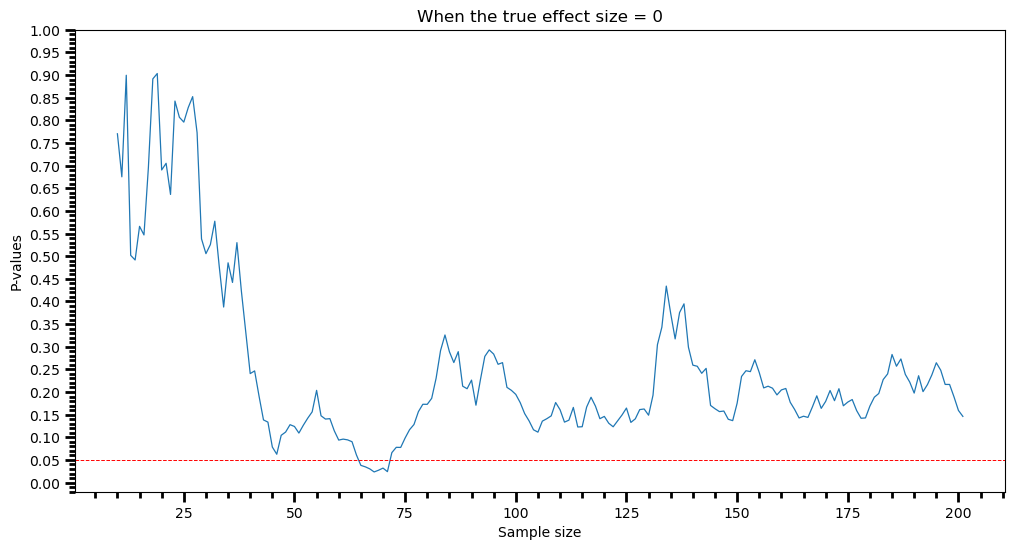

In [10]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)

plt.ticklabel_format(style='plain', axis='y')

ax.plot(range(10,len(grp_1)+1), p_val_list, linewidth=.9)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

ax.set_xlabel('Sample size')
ax.set_ylabel('P-values')

ax.set_yticks(np.arange(0, 1.01, .05))

plt.axhline(y = 0.05, color = 'r', linestyle = '--', linewidth=.7) 
plt.title('When the true effect size = 0')

As one collects data and does interim analysis, one inflates the type I err rate.

In [11]:
ctrl_pop = np.random.normal(100, 15, 300000)
trt_pop = np.random.normal(104.5, 15, 300000)

In [12]:
ctrl_grp = []
trt_grp = []

p_val_eff_list = []

for i in range(200):
    sampling_ctrl = np.random.choice(ctrl_pop, 1)
    sampling_trt = np.random.choice(trt_pop, 1)
    ctrl_grp.append(sampling_ctrl)
    trt_grp.append(sampling_trt)

    if len(ctrl_grp) >= 10:
        p_val = st.ttest_ind(ctrl_grp, trt_grp)[1]

        p_val_eff_list.append(p_val)
        
    else:
        pass

Text(0.5, 1.0, 'When the true effect size = 0.3')

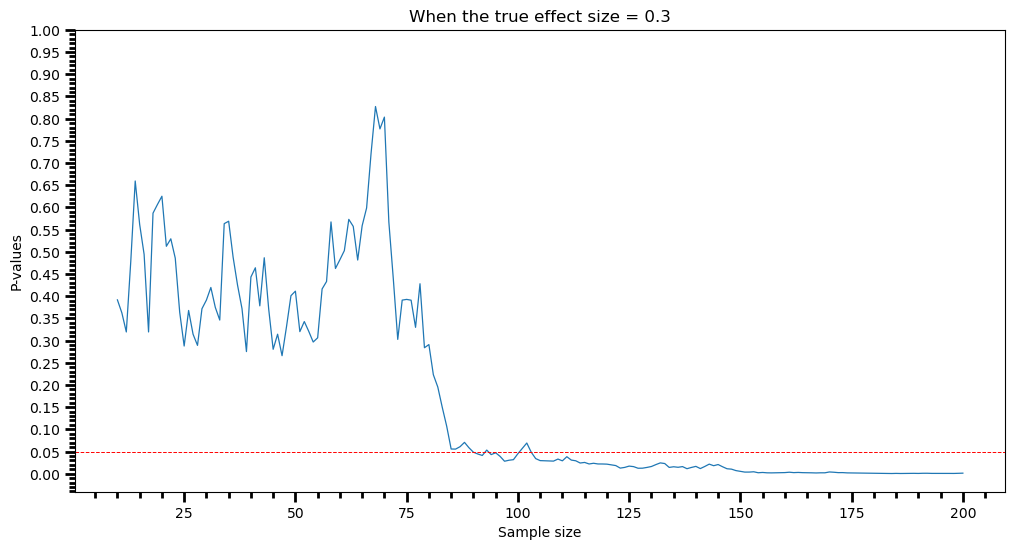

In [13]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)

plt.ticklabel_format(style='plain', axis='y')

ax.plot(range(10,len(ctrl_grp)+1), p_val_eff_list, linewidth=.9)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

ax.set_xlabel('Sample size')
ax.set_ylabel('P-values')

ax.set_yticks(np.arange(0, 1.01, .05))

plt.axhline(y = 0.05, color = 'r', linestyle = '--', linewidth=.7) 
plt.title('When the true effect size = 0.3')

When there **is** an effect, p-values still fluctuate at the start but then they level off since the statistical power increases as the sample size does.

In [ ]:
# Parameters
N = 100  # Total datapoints per condition
looks = 5  # Number of looks at the data
nsims = 50000  # Number of simulated studies
alphalevel = 0.05  # Significance level

# Determine look points
if looks > 1:
    look_at_n = np.ceil(np.linspace(N / looks, N, looks)).astype(int)
else:
    look_at_n = np.array([N])
look_at_n = look_at_n[look_at_n > 2]  # Remove looks at N of 1 or 2
looks = len(look_at_n)  # Update number of looks if necessary

# Initialize variables
matp = np.full((nsims, looks), np.nan)  # Matrix for p-values
p = np.zeros(nsims)  # Variable to save smallest p-values

# Simulate studies
for i in range(nsims):
    x = np.random.normal(0, 1, N)
    y = np.random.normal(0, 1, N)
    for j in range(looks):
        test_stat, p_value = st.ttest_ind(x[:look_at_n[j]], y[:look_at_n[j]], equal_var=True)
        matp[i, j] = p_value
    print(f'Loop {i + 1} of {nsims}')

# Save Type I error rate based on smallest p-value at all looks
for i in range(nsims):
    significant_p = matp[i, matp[i] < alphalevel]
    p[i] = significant_p[0] if len(significant_p) > 0 else matp[i, -1]

Loop 1 of 50000
Loop 2 of 50000
Loop 3 of 50000
Loop 4 of 50000
Loop 5 of 50000
Loop 6 of 50000
Loop 7 of 50000
Loop 8 of 50000
Loop 9 of 50000
Loop 10 of 50000
Loop 11 of 50000
Loop 12 of 50000
Loop 13 of 50000
Loop 14 of 50000
Loop 15 of 50000
Loop 16 of 50000
Loop 17 of 50000
Loop 18 of 50000
Loop 19 of 50000
Loop 20 of 50000
Loop 21 of 50000
Loop 22 of 50000
Loop 23 of 50000
Loop 24 of 50000
Loop 25 of 50000
Loop 26 of 50000
Loop 27 of 50000
Loop 28 of 50000
Loop 29 of 50000
Loop 30 of 50000
Loop 31 of 50000
Loop 32 of 50000
Loop 33 of 50000
Loop 34 of 50000
Loop 35 of 50000
Loop 36 of 50000
Loop 37 of 50000
Loop 38 of 50000
Loop 39 of 50000
Loop 40 of 50000
Loop 41 of 50000
Loop 42 of 50000
Loop 43 of 50000
Loop 44 of 50000
Loop 45 of 50000
Loop 46 of 50000
Loop 47 of 50000
Loop 48 of 50000
Loop 49 of 50000
Loop 50 of 50000
Loop 51 of 50000
Loop 52 of 50000
Loop 53 of 50000
Loop 54 of 50000
Loop 55 of 50000
Loop 56 of 50000
Loop 57 of 50000
Loop 58 of 50000
Loop 59 of 50000
Loop 6

Text(0.5, 1.0, 'Distribution of p-values with double-dipping')

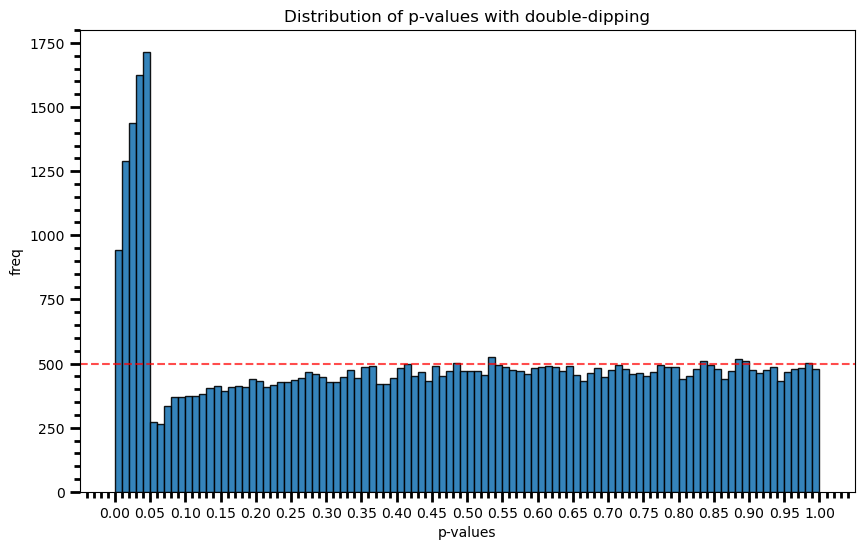

In [41]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

plt.ticklabel_format(style='plain', axis='y')

ax.hist(p, bins=100, edgecolor='black', alpha=.9)

ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

ax.set_xticks(np.arange(0, 1.01, 0.05))

ax.set_xlabel('p-values')
ax.set_ylabel('freq')

plt.axhline(nsims / 100, color='red', linestyle="--", alpha=.7)
plt.title('Distribution of p-values with double-dipping')

As one can see, p-values are not uniformly distributed anymore.